# Data Collection

In [29]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [30]:
data.to_csv("../data/raw/data.csv", index=False)

# Exploration

In [31]:
data.shape

(48895, 16)

In [32]:
#Info about data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [33]:
#Analysing duplicate ids, since it's the only column that should not have duplicates
print(f"Duplicated IDs: {data['id'].duplicated().sum()}")

Duplicated IDs: 0


In [34]:
#Removing irrelevant data for the training
data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis=1, inplace=True)
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


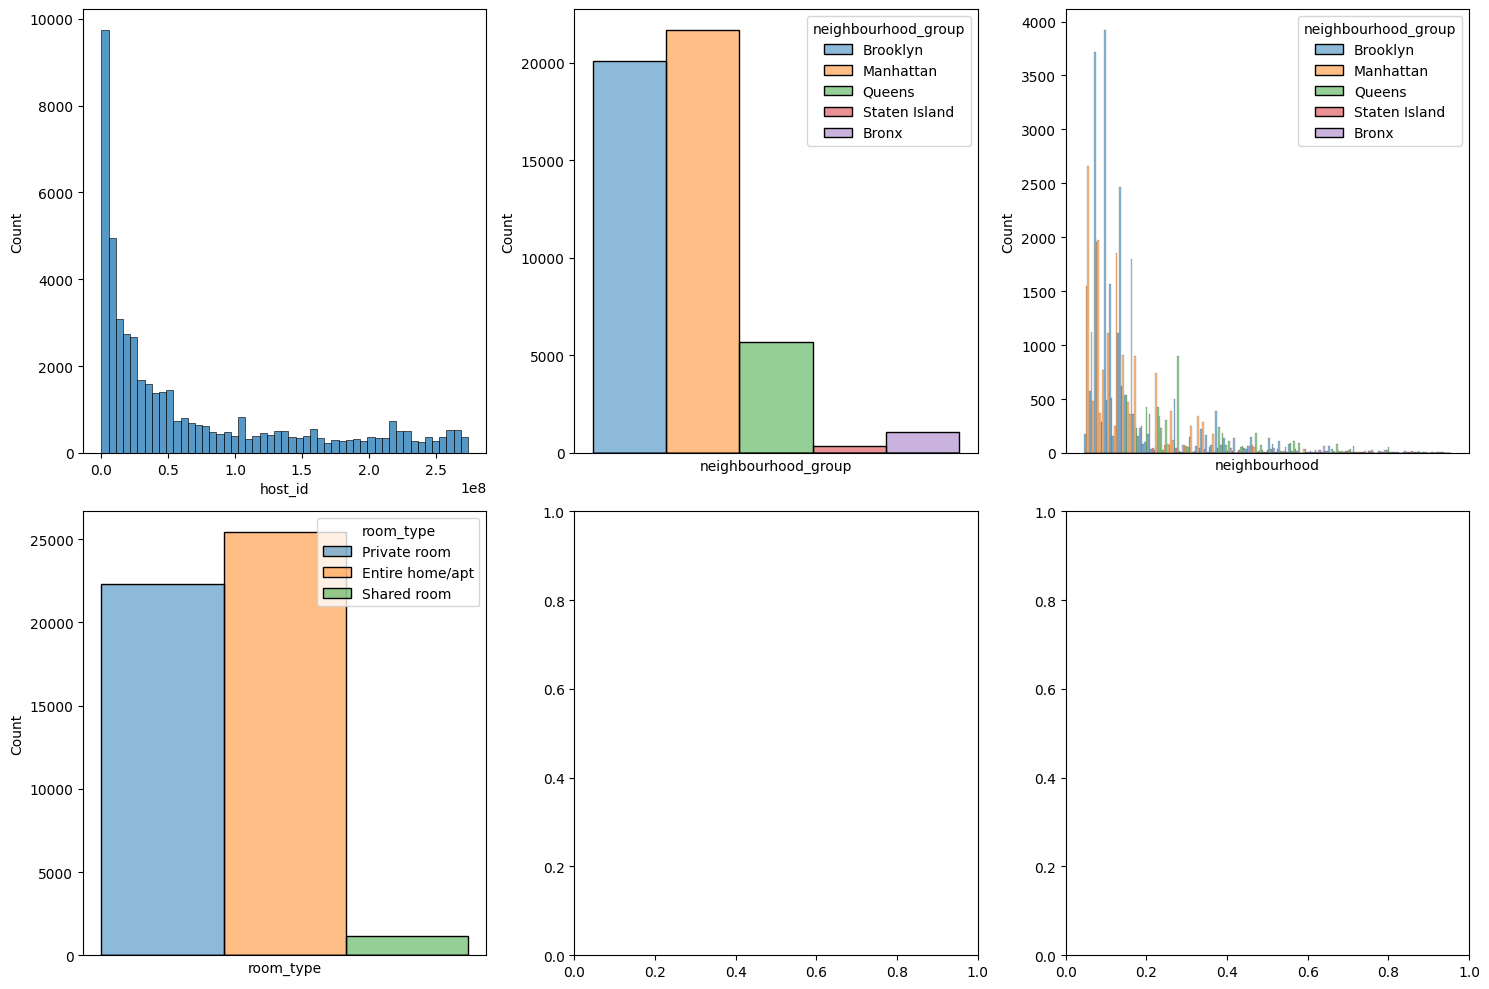

In [35]:
#Analysis of categorical variables
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.histplot(ax=axis[0, 0], data=data, x="host_id")
sns.histplot(ax=axis[0, 1], data=data, x="neighbourhood_group", hue="neighbourhood_group").set_xticks([])
sns.histplot(ax=axis[0, 2], data=data, x="neighbourhood", hue="neighbourhood_group", log_scale=True).set_xticks([])
sns.histplot(ax=axis[1, 0], data=data, x="room_type", hue="room_type").set_xticks([])
plt.tight_layout()
plt.show()

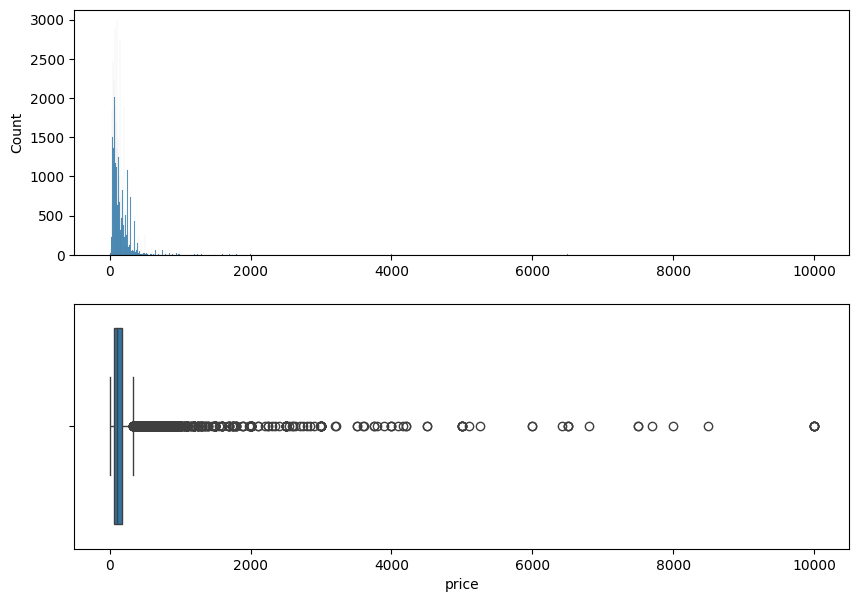

In [36]:
#Analysis of numeric variables
fig, axis = plt.subplots(2, figsize = (10, 7))

sns.histplot(ax=axis[0], data=data, x="price").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x = "price")

plt.show()

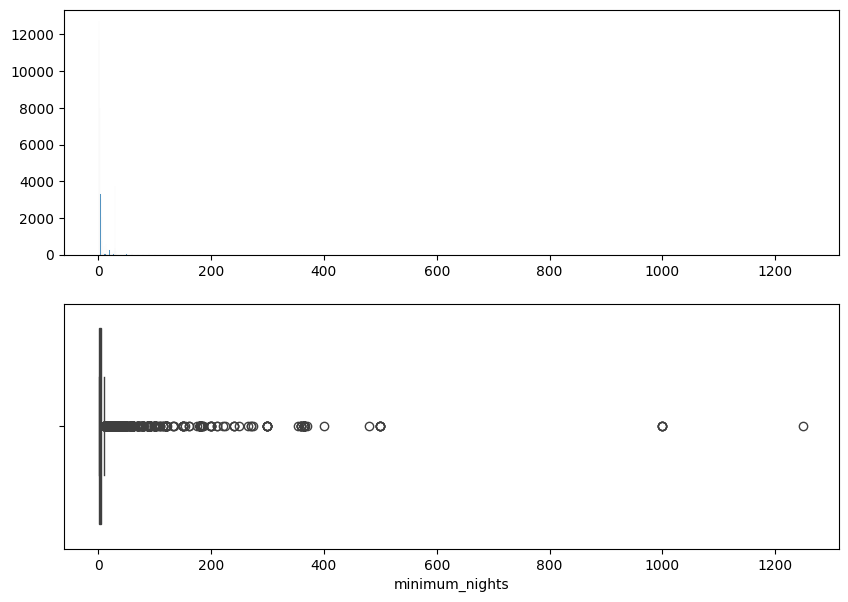

In [37]:
#Analysis of numeric variables
fig, axis = plt.subplots(2, figsize = (10, 7))

sns.histplot(ax=axis[0], data=data, x="minimum_nights").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1], data=data, x="minimum_nights")

plt.show()

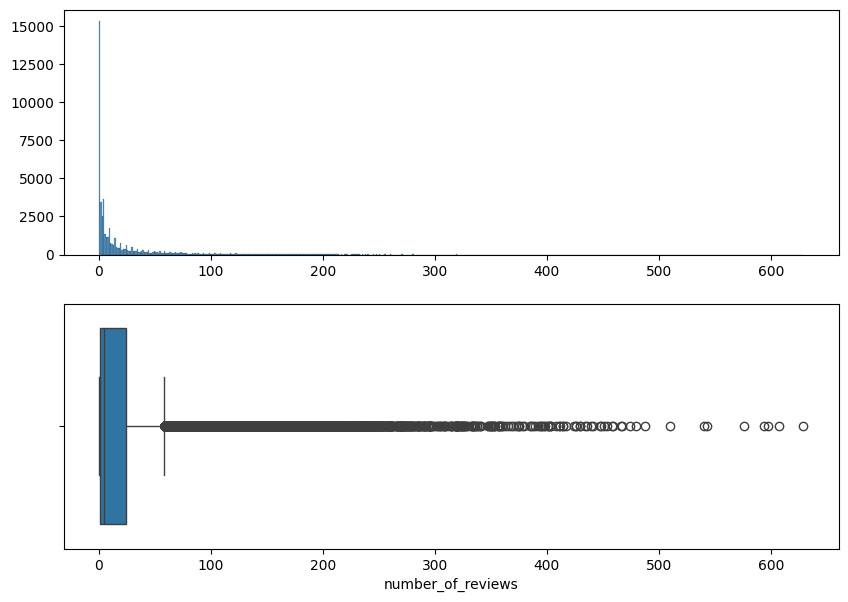

In [38]:
#Analysis of numeric variables
fig, axis = plt.subplots(2, figsize = (10, 7))

sns.histplot(ax=axis[0], data=data, x="number_of_reviews").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1], data=data, x="number_of_reviews")

plt.show()

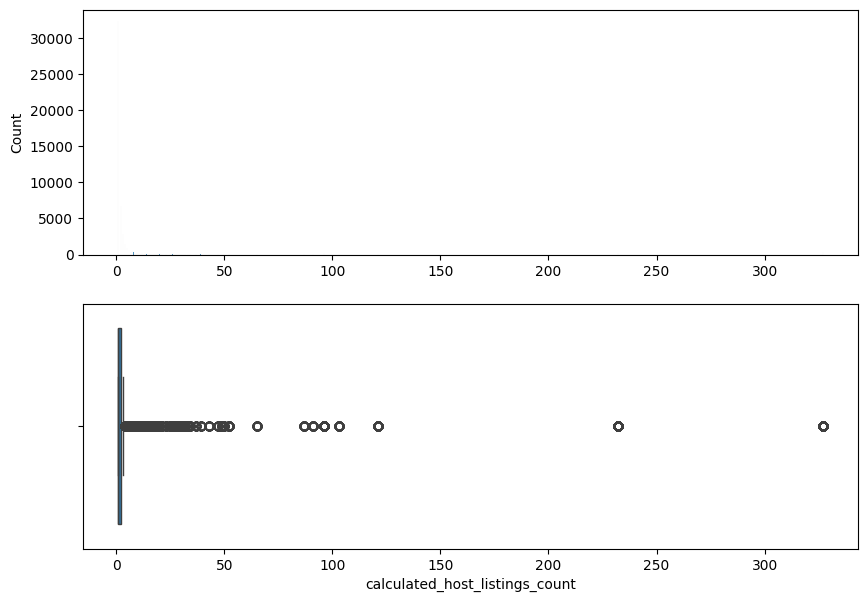

In [39]:
#Analysis of numeric variables
fig, axis = plt.subplots(2, figsize = (10, 7))

sns.histplot(ax=axis[0], data=data, x="calculated_host_listings_count").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="calculated_host_listings_count")

plt.show()

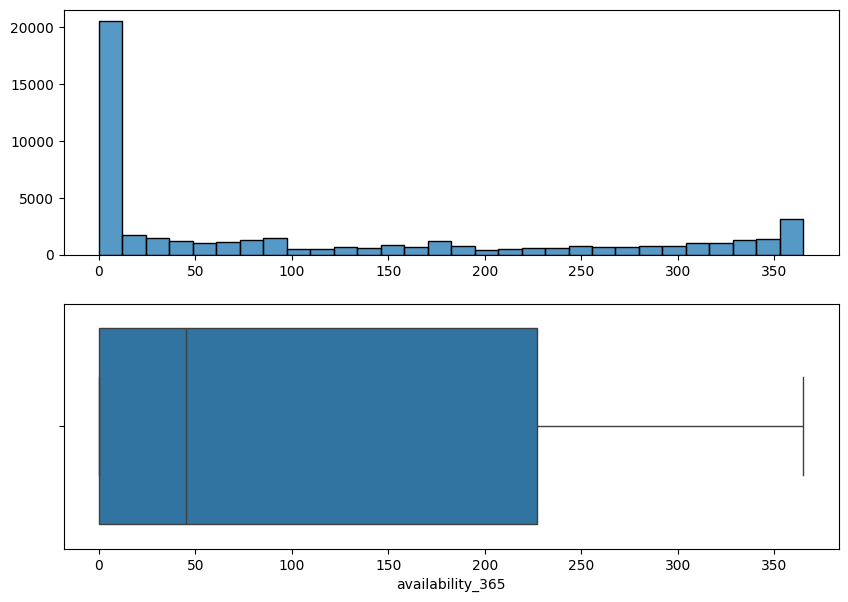

In [40]:
#Analysis of numeric variables
fig, axis = plt.subplots(2, figsize = (10, 7))

sns.histplot(ax=axis[0], data=data, x="availability_365").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1], data=data, x="availability_365")

plt.show()

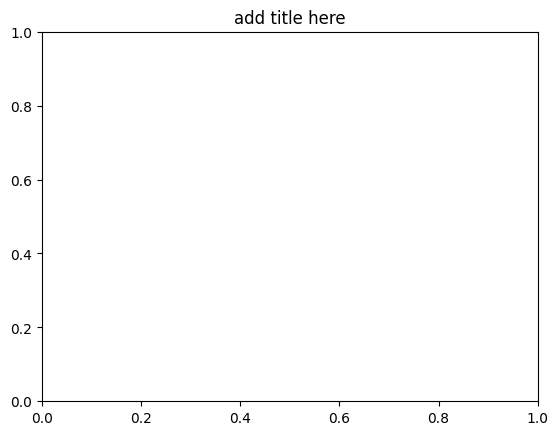

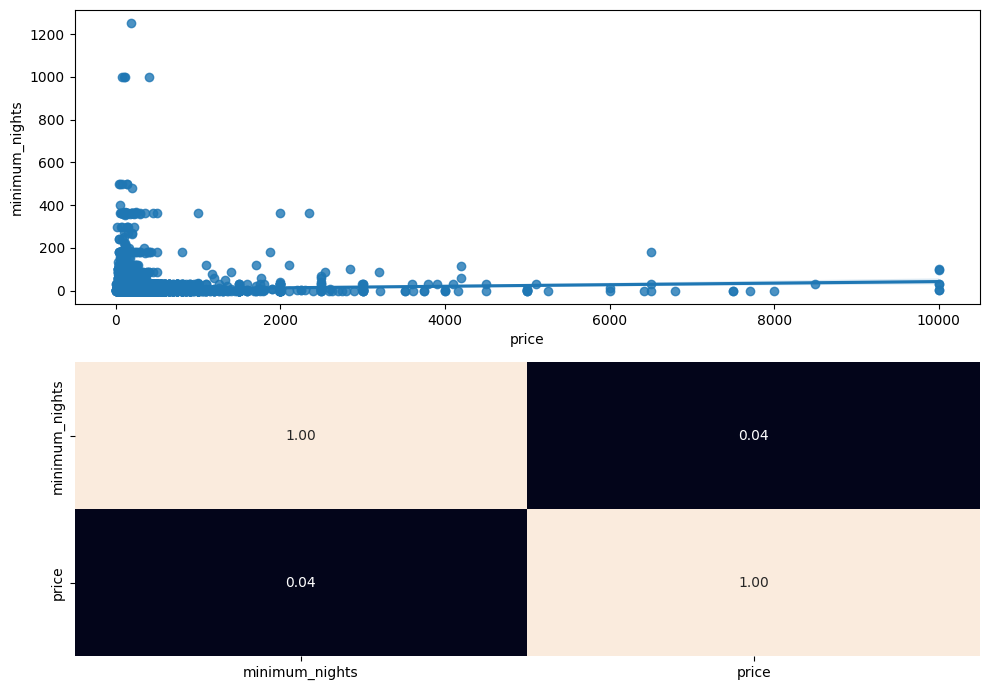

In [46]:
#Numerical-numerical analysis
fig, axis = plt.subplots(2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax=axis[0], data=data, x="price", y="minimum_nights").set_title("test")
sns.heatmap(data[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax=axis[1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()